In [1]:
#Question 1 
#summary statistics

import numpy as np
import scipy.stats as sts
import scipy.special as spc

clms = np.loadtxt('clms.txt')
clms_stats=sts.describe(clms)
clms_median=np.median(clms)
clms_std=np.std(clms)
print('mean = ', np.mean(clms))
print('median = ', np.median(clms))
print('maximum = ', max(clms))
print('minimum = ', min(clms))
print('standard deviation = ', np.std(clms))


mean =  720.277975327
median =  172.21
maximum =  227967.25
minimum =  0.01
standard deviation =  3972.66375639


<IPython.core.display.Javascript object>


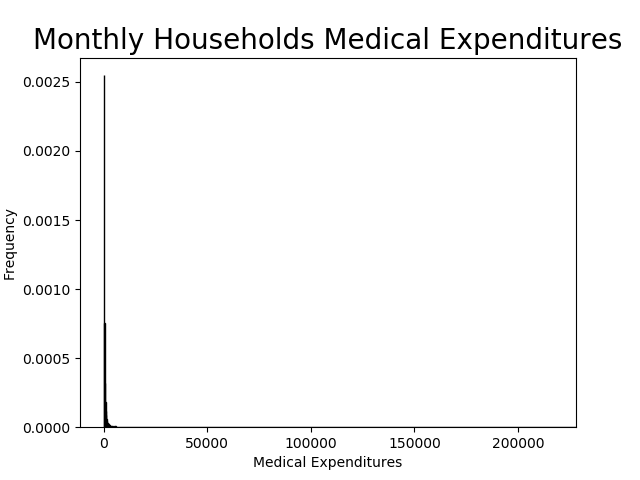

(-11398.351999999999, 228000)

In [47]:
#draw histogram for complete dataset
import matplotlib.pyplot as plt


%matplotlib notebook
count1, bins1, ignored = plt.hist(clms, 1000, edgecolor='black', normed=True)
plt.title('Monthly Households Medical Expenditures', fontsize=20)
plt.xlabel('Medical Expenditures')
plt.ylabel('Frequency')
plt.xlim([None, 228000])  # This gives the xmin and xmax to be plotted"


<IPython.core.display.Javascript object>


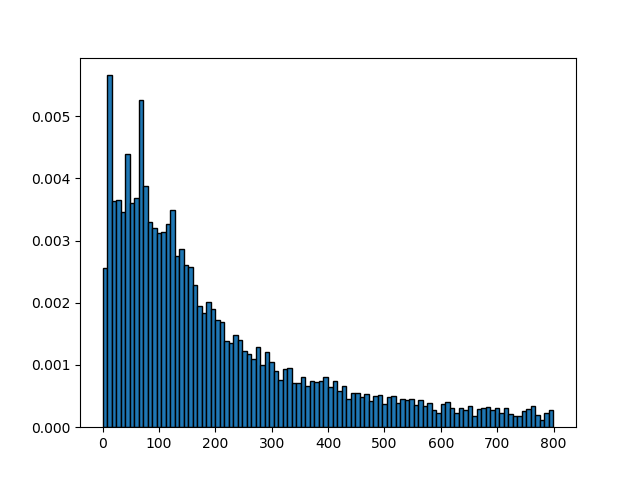

0.125062531266


In [45]:
#draw graph for $800 and under
#define the new data and weights
dist_pts = np.linspace(0, 800, 800)
clmst=clms[clms<=800]
weights=(1/clms.shape[0])*np.ones_like(clmst)
%matplotlib notebook
count, bins, ignored = plt.hist(clmst, 100, weights=weights, edgecolor='black', normed=True)
#I like the second graph. The second graph gives much more information about the distribution of the vast majority of the data. It omits the outliers of the data. 

In [19]:
#Question 2
#Define gamma distribution
def gamma_pdf(xvals, alpha, beta):
    pdf_vals    = 1/(beta ** alpha * spc.gamma(alpha)) * xvals ** (alpha-1) * np.exp( - (xvals) / (beta))    

    return pdf_vals
def log_lik_gamma(xvals, alpha, beta):
    pdf_vals = gamma_pdf(xvals, alpha, beta)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()

    return log_lik_val



In [20]:
#report alpha_0, beta_0, and log likehood at alpha_0 and beta_0
beta_0 = np.var(clms)/np.mean(clms)
alpha_0 = np.mean(clms)/beta_0
print(alpha_0, beta_0)

0.0328727966942 21911.0647028


In [21]:
#now we look for maximized log likelihood
def gamma_crit(params, args):
    alpha, beta = params
    xvals = args
    log_lik_val = log_lik_gamma(xvals, alpha, beta)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val


In [22]:
#optimize the result
import scipy.optimize as opt
params_init = np.array([alpha_0,beta_0])
mle1_args = clms
results = opt.minimize(gamma_crit, params_init, args=(mle1_args), method='L-BFGS-B',bounds=((1e-10, None), (1e-10, None)))
alpha_MLE, beta_MLE = results.x



In [23]:
#Report result
print('alpha_MLE=', alpha_MLE, ' beta_MLE=', beta_MLE)
print("log likelikehood=", -results.fun)

alpha_MLE= 0.221755322727  beta_MLE= 21911.0646992
log likelikehood= -82076.4516057


<IPython.core.display.Javascript object>


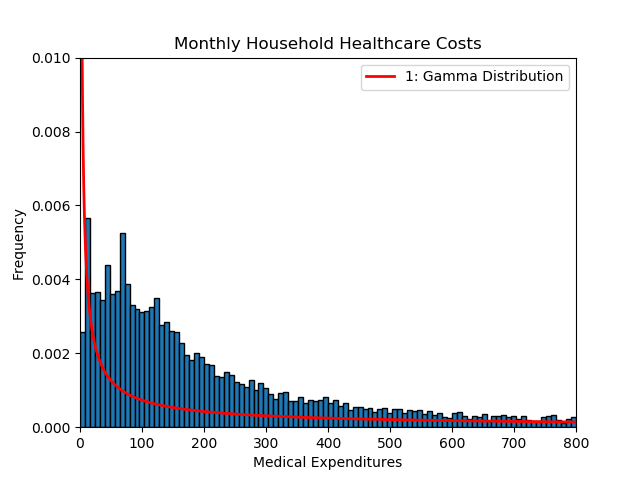

/Users/yuanxizhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.


In [24]:
#draw graph
dist_pts = np.linspace(0, 800, 800)
clmst=clms[clms<=800]
weights=(1/clms.shape[0])*np.ones_like(clmst)
%matplotlib notebook
count, bins, ignored = plt.hist(clmst, 100, weights=weights, edgecolor='black', normed=True)

plt.xlim(0,800)
plt.plot(dist_pts, gamma_pdf(dist_pts, alpha_MLE, beta_MLE),
         linewidth=2, color='r',label='1: Gamma Distribution')
plt.ylim(0,0.01)
plt.title('Monthly Household Healthcare Costs')
plt.xlabel('Medical Expenditures')
plt.ylabel('Frequency')
plt.legend(loc='upper right',frameon=True,fancybox=True)



In [28]:
#Question 3
def gg_pdf(xvals, alpha, beta, m):
    pdf_vals    = m/(beta ** alpha * spc.gamma(alpha/m)) * xvals ** (alpha-1) * np.exp( - ((xvals / beta)**m))   

    return pdf_vals
def log_lik_gg(xvals, alpha, beta, m):
    pdf_vals = gg_pdf(xvals, alpha, beta, m)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()

    return log_lik_val

In [29]:
#initial guess
print('Log-likelihood 2: ', log_lik_gg(clms, alpha_MLE, beta_MLE, 1))

Log-likelihood 2:  -82076.4516057


In [30]:
#find optimized value
def gg_crit(params, args):
    alpha, beta, m = params
    xvals = args
    log_lik_val = log_lik_gg(xvals, alpha, beta, m)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val
params_init = np.array([alpha_MLE, beta_MLE,1])
mle1_args = clms
results2 = opt.minimize(gg_crit, params_init, args=(mle1_args), method='L-BFGS-B',bounds=((1e-10, None), (1e-10, None),(1e-10, None)))
alpha_MLEGG, beta_MLEGG, m_MLEGG = results2.x


In [31]:
#report results
print('alpha_MLEGG=', alpha_MLEGG, ' beta_MLEGG=', beta_MLEGG, ' m_MLEGG=', m_MLEGG)
print("log likelikehoodGG=", -results2.fun)

alpha_MLEGG= 0.221737617595  beta_MLEGG= 21911.0644318  m_MLEGG= 0.997091563777
log likelikehoodGG= -82076.4467909


<IPython.core.display.Javascript object>


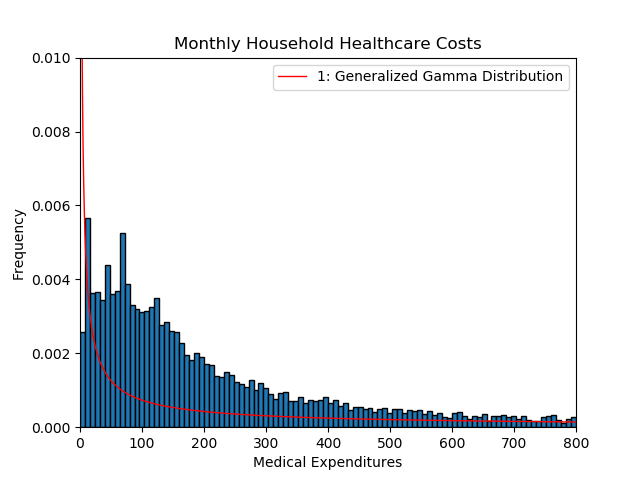

/Users/yuanxizhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
#draw a graph
dist_pts = np.linspace(0, 800, 800)
clmst=clms[clms<=800]
weights=(1/clms.shape[0])*np.ones_like(clmst)
%matplotlib notebook
count, bins, ignored = plt.hist(clmst, 100, weights=weights, edgecolor='black', normed=True)

plt.xlim(0,800)
plt.plot(dist_pts, gg_pdf(dist_pts, alpha_MLEGG, beta_MLEGG,m_MLEGG),
         linewidth=1, color='r',label='1: Generalized Gamma Distribution')
plt.ylim(0,0.01)
plt.title('Monthly Household Healthcare Costs')
plt.xlabel('Medical Expenditures')
plt.ylabel('Frequency')
plt.legend(loc='upper right',frameon=True,fancybox=True)

In [33]:
#Questions 4
def gb2_pdf(xvals, a, b, p, q):
    pdf_vals    = a * xvals ** (a * p -1)/((b ** (a * p)) * spc.beta(p,q) * (1+((xvals/b) ** a) ) **(p+q))  

    return pdf_vals
def log_lik_gb(xvals, a, b, p, q):
    pdf_vals = gb2_pdf(xvals, a, b, p, q)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()

    return log_lik_val

In [34]:
#initial values
a_0 = m_MLEGG
q_0 = 10000
b_0 = (q_0**(1/m_MLEGG))*beta_MLEGG
p_0 = alpha_MLEGG
print('Log-likelihood 3: ', log_lik_gb(clms, a_0, b_0, p_0, q_0))

In [36]:
#find optimized value
def gb2_crit(params, args):
    a,b,p,q = params
    xvals = args
    log_lik_val = log_lik_gb(xvals, a, b, p, q)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

params_init = np.array([a_0, b_0, p_0,q_0])
mle1_args = clms
results3 = opt.minimize(gb2_crit, params_init, args=(mle1_args), method='L-BFGS-B',bounds=((1e-10, None), (1e-10, None),(1e-10, None),(1e-10, None)))
a_MLEgb, b_MLEgb, p_MLEgb, q_MLEgb = results3.x

In [37]:
print('a_MLEgb=', a_MLEgb, ' b_MLEgb=', b_MLEgb, ' p_MLEgb', p_MLEgb, ' q_MLEgb', q_MLEgb)
print("log likelikehoodgb2=", -results3.fun)

a_MLEgb= 0.698999251212  b_MLEgb= 225077019.503  p_MLEgb 0.99763662056  q_MLEgb 10000.0010966
log likelikehoodgb2= -76460.0235775


<IPython.core.display.Javascript object>


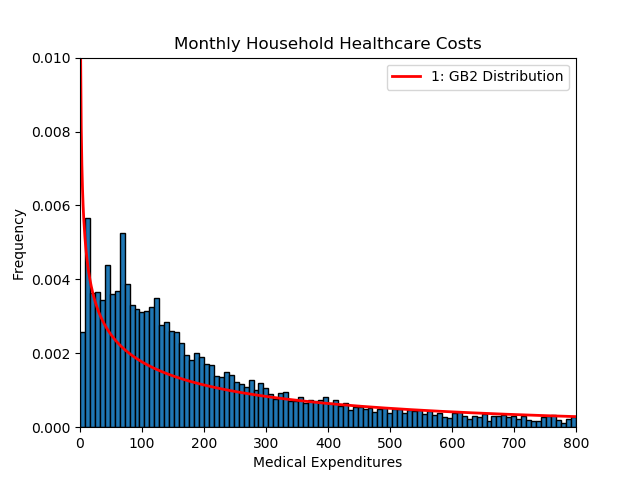

/Users/yuanxizhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
dist_pts = np.linspace(0, 800, 800)
clmst=clms[clms<=800]
weights=(1/clms.shape[0])*np.ones_like(clmst)
%matplotlib notebook
count, bins, ignored = plt.hist(clmst, 100, weights=weights,edgecolor='black', normed=True)

plt.xlim(0,800)
plt.plot(dist_pts, gb2_pdf(dist_pts, a_MLEgb, b_MLEgb, p_MLEgb, q_MLEgb),
         linewidth=2, color='r',label='1: GB2 Distribution')
plt.ylim(0,0.01)
plt.title('Monthly Household Healthcare Costs')
plt.xlabel('Medical Expenditures')
plt.ylabel('Frequency')
plt.legend(loc='upper right',frameon=True,fancybox=True)

In [39]:
#Question 5
ll_gamma = -results.fun
ll_gg = -results2.fun
ll_gb2 = -results3.fun
#b-d
LR_val = 2 *(ll_gb2-ll_gamma)
pval_1 = 1.0 - sts.chi2.cdf(LR_val, 4)
print('chi squared of H0 with 4 degrees of freedom p-value = ', pval_1)
print ('chi squared1=', LR_val)

#c-d
LR_val2 = 2 * (ll_gb2-ll_gg)
pval_2 = 1.0 - sts.chi2.cdf(LR_val2, 4)
print('chi squared of H0 with 4 degrees of freedom p-value = ', pval_2)
print ('chi squared2=', LR_val2)


chi squared of H0 with 4 degrees of freedom p-value =  0.0
chi squared1= 11232.8560564
chi squared of H0 with 4 degrees of freedom p-value =  0.0
chi squared2= 11232.8464268


In [40]:
#Question 6
#probabilities
import scipy.integrate as scint
def gb2_fit(x):
    return gb2_pdf(x,a_MLEgb, b_MLEgb, p_MLEgb, q_MLEgb)
pr_under_1000_gb2 = scint.quad(gb2_fit,0,1000)
pr_over_1000_gb2 = 1-(pr_under_1000_gb2[0]-pr_under_1000_gb2[1])
print('Probability of a claim over 1000 dollars: ',pr_over_1000_gb2)

Probability of a claim over 1000 dollars:  0.1623670307074716


In [41]:
def gamma_fit(x):
    return gamma_pdf(x,alpha_MLE, beta_MLE)
pr_under_1000_gamma = scint.quad(gamma_fit,0,1000)
pr_over_1000_gamma = 1-(pr_under_1000_gamma[0]-pr_under_1000_gamma[1])
print('Probability of a claim over 1000 dollars: ',pr_over_1000_gamma)

Probability of a claim over 1000 dollars:  0.4519597444849094
